In [1]:
import pandas as pd
# !pip install pyarrow
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(font_scale=2., palette='tab20') 

In [2]:
data = pd.read_parquet("../results/grid_search/45/ts_model-state.parquet")

In [4]:
data

,round,trial,p,w,M,l,b,Q,T,interest,loop_amp
0,0,0,1.0,0,1,1,0.0,0,2000,[0.49373959317315497],0.000022
1,1,0,1.0,0,1,1,0.0,0,2000,[0.4999225380088286],0.000119
2,2,0,1.0,0,1,1,0.0,0,2000,[0.5028194114113496],0.000191
3,3,0,1.0,0,1,1,0.0,0,2000,[0.5110081456870034],0.000484
4,4,0,1.0,0,1,1,0.0,0,2000,[0.5099024911192782],0.000436
...,...,...,...,...,...,...,...,...,...,...,...
2969995,1995,2,1.0,0,10,10,1.0,0,2000,"[-0.02856977204075948, 0.008973464781374767, 0...",0.731646
2969996,1996,2,1.0,0,10,10,1.0,0,2000,"[-0.038253035123077775, 0.0015126961142780306,...",0.704677
2969997,1997,2,1.0,0,10,10,1.0,0,2000,"[-0.04758528852292839, 0.004153218817393247, -...",0.710618
2969998,1998,2,1.0,0,10,10,1.0,0,2000,"[-0.027718621426768127, 0.003093184943470175, ...",0.734562


In [5]:
data.describe()

,round,trial,p,w,M,l,b,Q,T,loop_amp
count,2.970000e+06,2.970000e+06,2970000.0,2970000.0,2.970000e+06,2.970000e+06,2.970000e+06,2970000.0,2970000.0,2.970000e+06
mean,9.995000e+02,1.000000e+00,1.0,0.0,7.266667e+00,4.133333e+00,5.000000e-01,0.0,2000.0,8.261237e+00
std,5.773503e+02,8.164967e-01,0.0,0.0,2.489088e+00,2.526306e+00,3.162278e-01,0.0,0.0,2.730467e+01
min,0.000000e+00,0.000000e+00,1.0,0.0,1.000000e+00,1.000000e+00,0.000000e+00,0.0,2000.0,1.488130e-12
25%,4.997500e+02,0.000000e+00,1.0,0.0,5.000000e+00,2.000000e+00,2.000000e-01,0.0,2000.0,8.609377e-02
50%,9.995000e+02,1.000000e+00,1.0,0.0,8.000000e+00,4.000000e+00,5.000000e-01,0.0,2000.0,3.451953e-01
75%,1.499250e+03,2.000000e+00,1.0,0.0,9.000000e+00,6.000000e+00,8.000000e-01,0.0,2000.0,1.899310e+00
max,1.999000e+03,2.000000e+00,1.0,0.0,1.000000e+01,1.000000e+01,1.000000e+00,0.0,2000.0,4.615746e+02


In [6]:
data['max_interest'] = data['interest'].apply(max)

In [7]:
import numpy as np
from scipy import interpolate

In [18]:
# X = data['M']
# Y = data['l']
# Z = data['max_interest']
# color = data['b']

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(Y, X, Z, c=color)
# ax.set_xlabel("M")
# ax.set_ylabel("l")
# ax.set_zlabel("max interest")

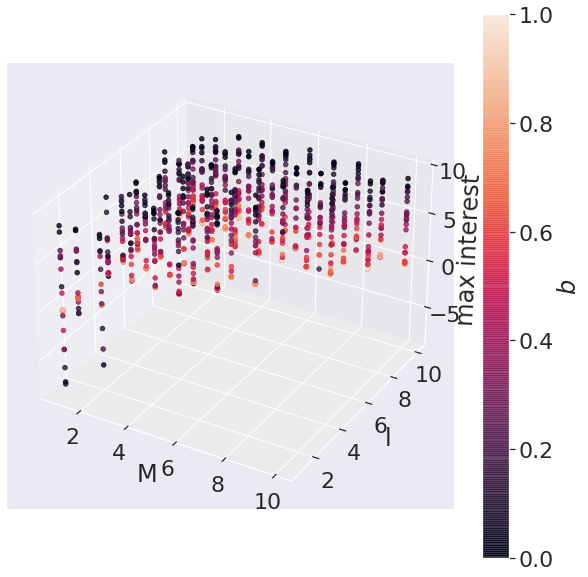

In [20]:
data_1999 = data[data['round'] == 1999]

X = data_1999['M']
Y = data_1999['l']
Z = data_1999['max_interest']
color = data_1999['b']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
plt.xlabel('M')
plt.ylabel('l')
p = ax.scatter(Y, X, Z, c=color,alpha=0.8)

cbar = fig.colorbar(p, ax=ax)
cbar.set_label(r'$b$')

ax.set_xlabel("M")
ax.set_ylabel("l")
ax.set_zlabel("max interest")
plt.savefig('3d_var_wp_max_interest.pdf');

In [10]:
data_1999

,round,trial,p,w,M,l,b,Q,T,interest,loop_amp,max_interest
1999,1999,0,1.0,0,1,1,0.0,0,2000,[8.611053886186165],65.967572,8.611054
3999,1999,1,1.0,0,1,1,0.0,0,2000,[7.970522706298665],59.085209,7.970523
5999,1999,2,1.0,0,1,1,0.0,0,2000,[-7.617005989232182],52.280050,-7.617006
7999,1999,0,1.0,0,1,1,0.1,0,2000,[-7.843058000232764],54.177671,-7.843058
9999,1999,1,1.0,0,1,1,0.1,0,2000,[-6.081352202740327],34.601649,-6.081352
...,...,...,...,...,...,...,...,...,...,...,...,...
2961999,1999,1,1.0,0,10,9,1.0,0,2000,"[-0.004104367178860493, -0.0066607716105487455...",0.450348,0.007551
2963999,1999,2,1.0,0,10,9,1.0,0,2000,"[-0.004009262515485707, 0.03100967589009423, 0...",0.917237,0.031010
2965999,1999,0,1.0,0,10,10,1.0,0,2000,"[-0.014746508119704169, -0.012797270690282452,...",0.910051,0.027044
2967999,1999,1,1.0,0,10,10,1.0,0,2000,"[-0.020419657074231958, -0.030766439535549604,...",0.704330,0.014832


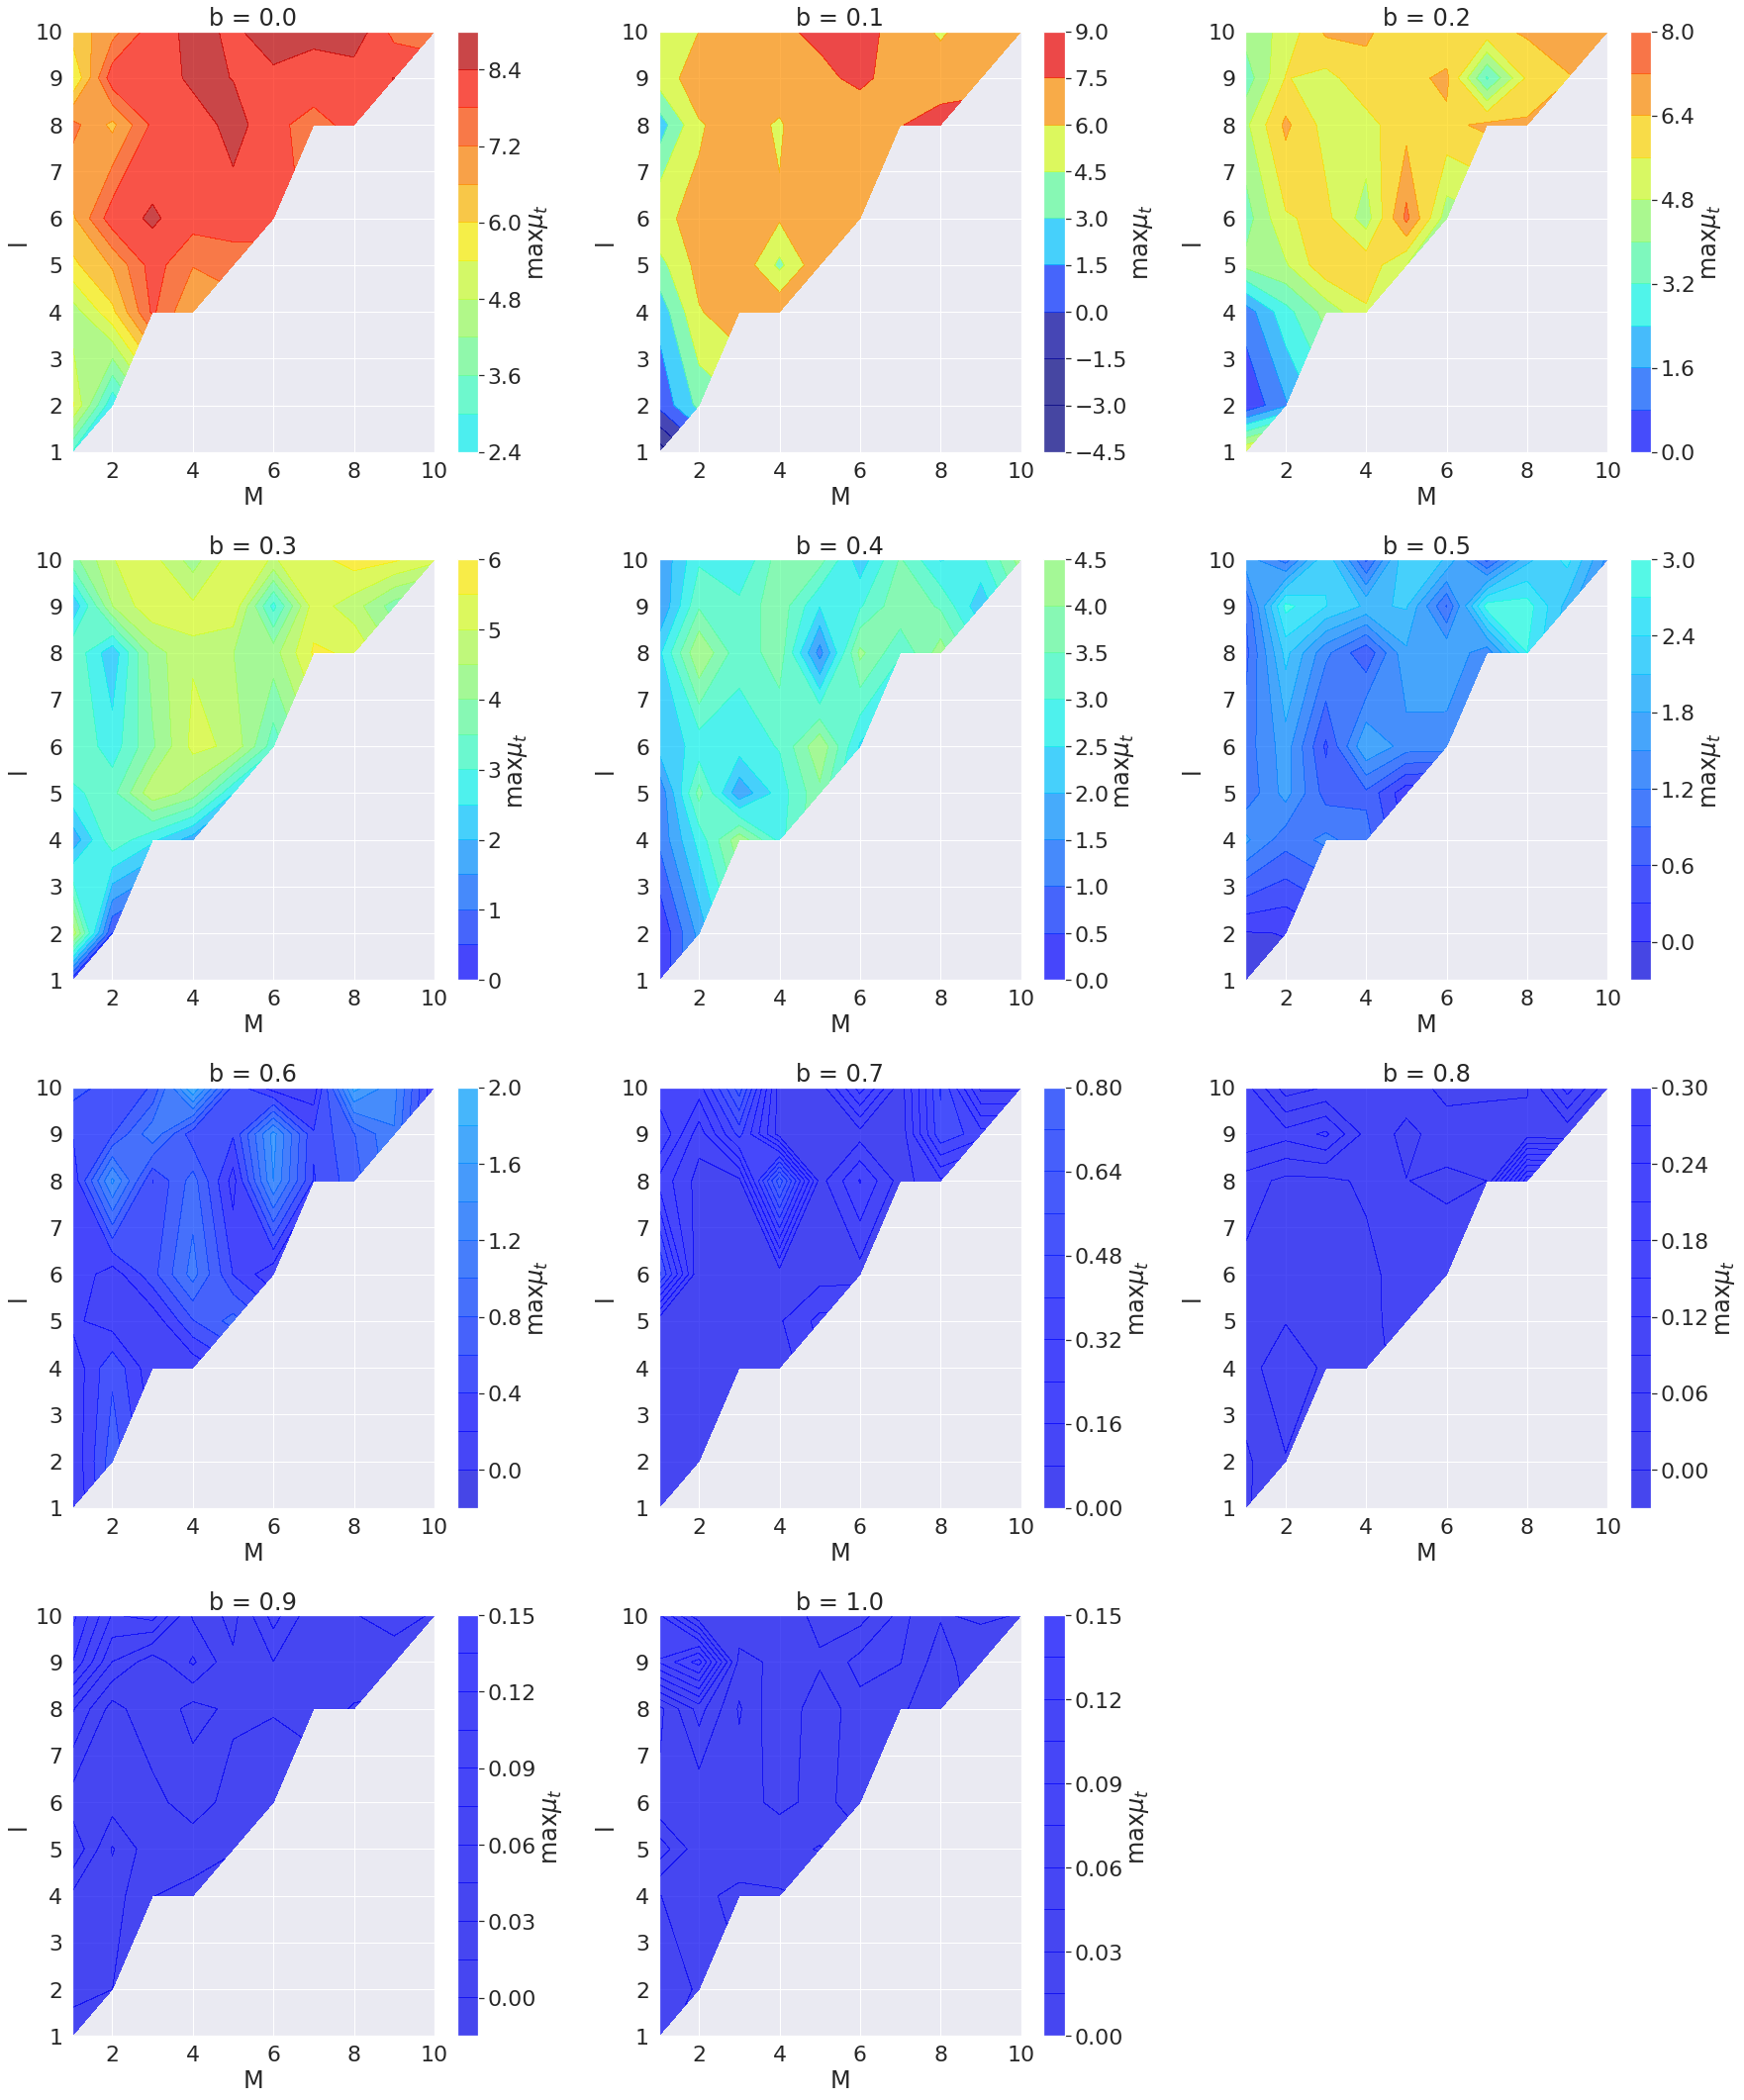

In [22]:
fig = plt.figure(figsize=(25,30))


data_1999 = data.where(data['round'] == 1999)

clims = -1, data_1999['max_interest'].max() 
# clims = data_1999['max_interest'].min(), data_1999['max_interest'].max() 

for i, b in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):
    plt.subplot(4,3,i+1)
    cols = ['M', 'l', 'max_interest']
    cur_b  = data_1999[data_1999['b'] == b]
    xyz = cur_b[cols].groupby(['M','l']).mean(['max_interest'])
    xyz = xyz.reset_index()
    xyz.columns =  ['M', 'l', 'max_interest']
    xyz = xyz.pivot('M', 'l')

    X=xyz.columns.levels[1].values
    Y=xyz.index.values
    Z=xyz.values
    Xi,Yi = np.meshgrid(X, Y)
    plt.xlabel('M')
    plt.ylabel('l')
    ax = plt.contourf(Xi, Yi, Z, 10, alpha=0.7, cmap=plt.cm.jet)
    plt.clim(*clims)

    cbar = fig.colorbar(ax)
    cbar.set_label(r'$\max \mu_t$')
    plt.title(f'b = {b}')
    plt.tight_layout()
    
plt.savefig('countour_wp.pdf');

In [17]:
print(clims)

(-7.843058000232764, 9.246699079560123)
